This file cleans state0 specific feature, `gps_radius` for iOS.

In [433]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import matplotlib.pyplot as plt

In [434]:
# get android and ios cleaned data
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())
ios_df = pd.read_csv(root / "data" / "processed" / "ios.csv", header=0)
android_df = pd.read_csv(root / "data" / "processed" / "android.csv", header=0)


In [435]:
ios_df.columns

Index(['init_time', 'eventAction', 'payloadCreation', 'eventStart', 'eventEnd',
       'eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude',
       'eventEndLatitude', 'eventEndLongitude', 'eventSensorDetectionMthd',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'eventSpeedChange', 'memsMedianLateralAccel', 'memsP75LateralAccel',
       'memsP95LateralAccel', 'memsMedianHorizontalNorm',
       'memsP75HorizontalNorm', 'memsP95HorizontalNorm',
       'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel',
       'bearing_angular_change_per_second', 'gyro_angular_change_per_second',
       'bearingAngleChange', 'gyroAngleChange', 'mems_radius', 'gps_radius',
       'validity_mean', 'speed_gap', 'aggressive'],
      dtype='object')

In [436]:
android_df.columns

Index(['init_time', 'eventAction', 'payloadCreation', 'eventStart', 'eventEnd',
       'eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude',
       'eventEndLatitude', 'eventEndLongitude', 'eventSensorDetectionMthd',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'eventSpeedChange', 'memsMedianLateralAccel', 'memsP75LateralAccel',
       'memsP95LateralAccel', 'memsMedianHorizontalNorm',
       'memsP75HorizontalNorm', 'memsP95HorizontalNorm',
       'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel',
       'bearing_angular_change_per_second', 'gyro_angular_change_per_second',
       'bearingAngleChange', 'gyroAngleChange', 'mems_radius', 'gps_radius',
       'validity_mean', 'speed_gap', 'aggressive'],
      dtype='object')

In [437]:
# get state 0 only for iOS
ios_df['eventSensorDetectionMthd'] = pd.to_numeric(ios_df['eventSensorDetectionMthd'], errors='coerce')
ios_df = ios_df.dropna(subset=['eventSensorDetectionMthd'])
ios_df['eventSensorDetectionMthd'] = ios_df['eventSensorDetectionMthd'].astype(int)

ios_df = ios_df[ios_df['eventSensorDetectionMthd'] == 0].copy()
print(ios_df['eventSensorDetectionMthd'].unique())

[0]


In [438]:
# get state 0 only for Android

android_df['eventSensorDetectionMthd'] = pd.to_numeric(android_df['eventSensorDetectionMthd'], errors='coerce')
android_df = android_df.dropna(subset=['eventSensorDetectionMthd'])
android_df['eventSensorDetectionMthd'] = android_df['eventSensorDetectionMthd'].astype(int)

android_df = android_df[android_df['eventSensorDetectionMthd'] == 0].copy()
print(android_df['eventSensorDetectionMthd'].unique())

[0]


In [439]:
kept_columns = [
    'eventType',
    'eventSampleSpeed',
    'eventDurationSeconds',
    'eventGPSSignalStrength',
    'eventStartSpeed',
    'eventEndSpeed',
    'gpsMedianLateralAccel',
    'gpsP75LateralAccel',
    'gpsP95LateralAccel',
    'bearing_angular_change_per_second',
    'bearingAngleChange',
    'gps_radius', 
    'aggressive'
]

android_df = android_df[[c for c in kept_columns if c in android_df.columns]]
ios_df = ios_df[[c for c in kept_columns if c in ios_df.columns]]

print(android_df.columns)
print(ios_df.columns)

Index(['eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel',
       'bearing_angular_change_per_second', 'bearingAngleChange', 'gps_radius',
       'aggressive'],
      dtype='object')
Index(['eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel',
       'bearing_angular_change_per_second', 'bearingAngleChange', 'gps_radius',
       'aggressive'],
      dtype='object')


In [440]:
android_df.shape, ios_df.shape

((315, 13), (20147, 13))

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/2637803747.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


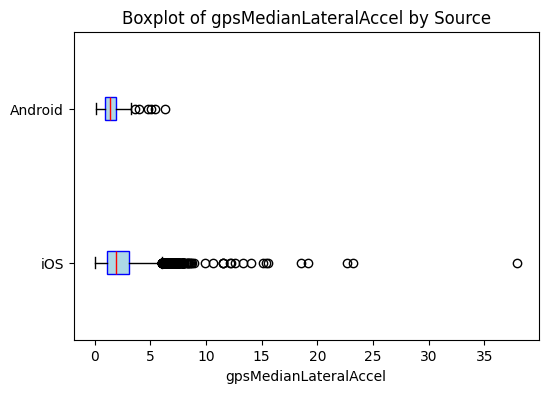

In [441]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['gpsMedianLateralAccel']
android_data = android_df['gpsMedianLateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gpsMedianLateralAccel by Source")
plt.xlabel("gpsMedianLateralAccel")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/367408185.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


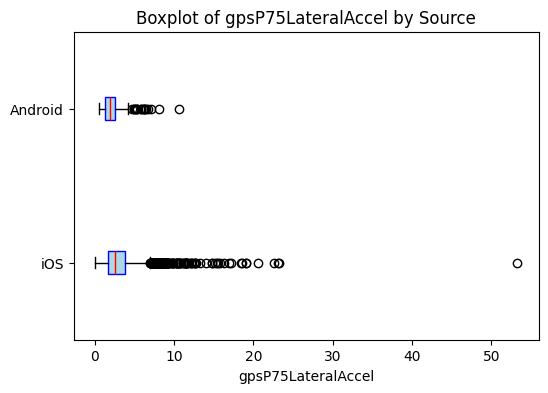

In [442]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['gpsP75LateralAccel']
android_data = android_df['gpsP75LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gpsP75LateralAccel by Source")
plt.xlabel('gpsP75LateralAccel')
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/2386451112.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


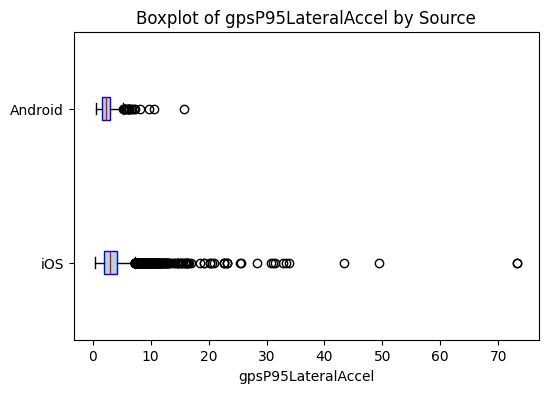

In [443]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['gpsP95LateralAccel']
android_data = android_df['gpsP95LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gpsP95LateralAccel by Source")
plt.xlabel('gpsP95LateralAccel')
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/21182620.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


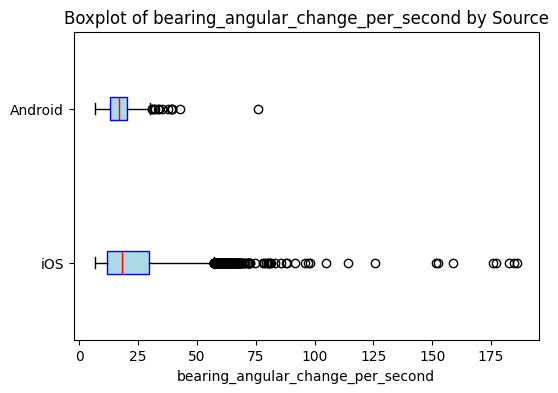

In [444]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['bearing_angular_change_per_second']
android_data = android_df['bearing_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of bearing_angular_change_per_second by Source")
plt.xlabel('bearing_angular_change_per_second')
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/2745538263.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


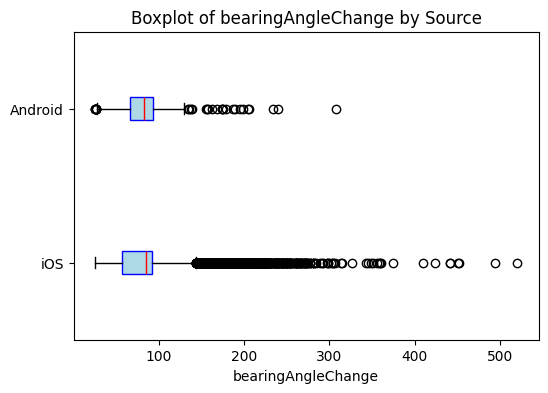

In [445]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['bearingAngleChange'].dropna()
android_data = android_df['bearingAngleChange'].dropna()

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of bearingAngleChange by Source")
plt.xlabel('bearingAngleChange')
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/1628349488.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


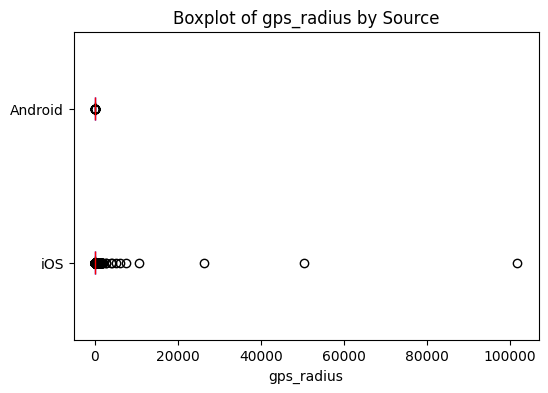

In [446]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['gps_radius'].dropna()
android_data = android_df['gps_radius'].dropna()

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gps_radius by Source")
plt.xlabel('gps_radius')
plt.show()

In [447]:
# Find percentile where infinite values start
n_total = len(ios_df)
n_inf = np.isinf(ios_df['gps_radius']).sum()
percentile_start = (1 - n_inf / n_total) * 100
print(f"Infinite values start above the {percentile_start:.2f}th percentile")

Infinite values start above the 98.93th percentile


In [448]:
ios_df.describe()

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,eventType,eventSampleSpeed,eventDurationSeconds,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,aggressive
count,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,20147.000000,2.014700e+04,20147.000000
mean,4.530848,14.298662,3.359880,5.517149,13.425247,15.533972,2.271526,2.857217,3.205423,22.659953,81.841238,inf,0.000546
std,0.499060,7.043533,2.809087,1.822009,7.568455,7.527425,1.546035,1.650600,1.957171,14.337335,37.353478,NaN,0.023361
min,4.000000,5.001024,0.914496,2.000000,0.000000,0.000000,0.000000,0.000000,0.326860,6.500694,25.000967,1.226815e+00,0.000000
25%,4.000000,9.307070,0.965531,4.739724,8.232543,10.352315,1.142840,1.664333,1.988682,11.548175,57.098441,9.271316e+00,0.000000
50%,5.000000,12.716134,2.936156,4.749145,11.614998,14.443356,1.870486,2.557273,2.940886,18.245882,84.997300,1.603136e+01,0.000000
75%,5.000000,17.468219,4.006219,5.164847,16.801407,19.382202,3.102844,3.798786,4.102401,29.754112,91.683768,3.649360e+01,0.000000
max,5.000000,76.020020,24.977380,10.535765,75.360214,81.243030,37.971184,53.305960,73.330480,186.285400,520.214200,inf,1.000000


In [449]:
ninety_percentile = ios_df['gps_radius'].quantile(0.90)
ios_df = ios_df[ios_df['gps_radius'] <= ninety_percentile]

In [450]:
ios_df.describe()

,eventType,eventSampleSpeed,eventDurationSeconds,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,aggressive
count,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000,18132.000000
mean,4.529616,13.013013,3.094092,5.548747,12.088005,14.306107,2.355881,2.904051,3.194069,24.067091,83.689149,20.868738,0.000607
std,0.499136,5.259837,2.554147,1.831273,5.752118,6.013211,1.581944,1.687183,1.893173,14.370208,36.740438,16.853035,0.024624
min,4.000000,5.001024,0.914496,2.000000,0.000000,0.000000,0.016886,0.228247,0.326860,6.500694,25.000967,1.226815,0.000000
25%,4.000000,9.030350,0.965420,4.740079,7.957840,10.011798,1.155101,1.649217,1.951723,13.005233,61.032643,8.815628,0.000000
50%,5.000000,12.160211,1.971375,4.751435,11.043717,13.839006,1.947926,2.626502,2.947798,19.839035,86.189442,14.233580,0.000000
75%,5.000000,16.099244,3.968250,5.264531,15.315120,18.022678,3.276342,3.907414,4.130130,31.438159,91.936995,27.328974,0.000000
max,5.000000,62.215187,22.931688,10.535765,62.552944,61.877430,37.971184,53.305960,73.249650,186.285400,520.214200,76.135500,1.000000


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_50398/1641416852.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_df['gps_radius'], android_df['gps_radius']],


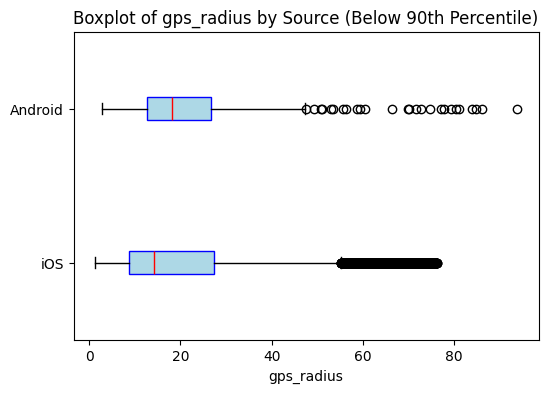

In [451]:
# Create box plot of new dataframe
plt.figure(figsize=(6,4))
plt.boxplot([ios_df['gps_radius'], android_df['gps_radius']],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of gps_radius by Source (Below 90th Percentile)")
plt.xlabel("gps_radius")
plt.show()

In [452]:
# Save new_df to file to later load
android_df.to_pickle(root / "data" / "processed" / "state0" / 'android_df.pkl')
ios_df.to_pickle(root / "data" / "processed" / "state0" / 'ios_df.pkl')